# **Grupo 5**

### Juan Carlos Zuñiga M, Julián Morales, Leonardo Agudelo y Maria Camila Diaz

### Descripcion:

La organización necesita predecir qué tipo de planes de internet y en qué rango de precios serán más contratados en los próximos 3 meses, considerando el impacto del estrato socioeconómico en la decisión de compra.

Actualmente, no existe un modelo predictivo que permita anticipar la demanda según el precio y el estrato, lo que podría generar una oferta desalineada con las necesidades del mercado, afectando la rentabilidad, planificación comercial y fidelización de clientes.

In [1]:
import pandas as pd                 #libreria para manejo de datos
import numpy as np                  #libreria para manejo de datos

import matplotlib.pyplot as plt     #libreria para graficos
import seaborn as sns               #libreria para graficos

import statsmodels.api as sm        #libreria para modelos estadisticos
from sklearn.metrics import mean_squared_error  #libreria para metricas de error

import random                 #mean_squared_error(y_true, y_pred) es la media del cuadrado de los errores

In [1]:
import pandas as pd

# Cargar el archivo Excel
#df = pd.read_excel("./Data/Ventas_portal3.xlsx")
df = pd.read_excel('https://github.com/Grupos5-EDA-icesi/Analisis-Exploratorio/raw/main/Data/Ventas_portal3.xlsx')

# Mostrar las dimensiones del DataFrame (filas, columnas)
print(df.shape)

#pd.set_option('display.max_rows', None) # Mostrar todas las filas
pd.set_option('display.max_columns', None) # Mostrar todas las columnas

(22393, 34)


In [ ]:
df.describe(include = "all")    # Estadísticas de las columnas

,id,date_creation,is_actived,motivo_is_actived,causal_anulacion_id,Genero,id_genero,Edad,city_owner,category,type_service,estrato,plan,id_plan,id_plan_open,price_plan,user_creation_id,cdo,contract,package,plan_type,zone,nombre_zone,type_ide,nombre_type_ide,ventas_Retiradas_causales,ventas_Retiradas_nombre_causal,Retiro,fecha_retiro,id_barrios,Barrios,id_comuna,Comuna,barrios_id_ciudades
count,22393.000000,22393,22393,2959,329.000000,22393,22393.000000,22393.000000,22393,22393,22393.000000,22393.000000,22393,22393.000000,22393.000000,22393.000000,22393.000000,22393,1.935200e+04,22393.000000,22393,22393.000000,22236,22393.000000,22393,1606,1606,22393,1606,21816.000000,21816,21816.000000,21816,21816.000000
unique,NaN,NaN,7,13,NaN,2,NaN,NaN,5,5,NaN,NaN,20,NaN,NaN,NaN,NaN,11064,NaN,NaN,3,NaN,4,NaN,5,4,32,2,NaN,NaN,386,NaN,38,NaN
top,NaN,NaN,Orden creada,Deuda,NaN,H,NaN,NaN,Cali,Residencial,NaN,NaN,DPL BA 250MB+VOZ ILIM-24,NaN,NaN,NaN,NaN,0005S2313,NaN,NaN,Dupla,NaN,O,NaN,CC,Anulacion,Cliente en cartera,NO,NaN,NaN,Manuela Beltran,NaN,Comuna 14,NaN
freq,NaN,NaN,19253,824,NaN,14045,NaN,NaN,21226,22220,NaN,NaN,4362,NaN,NaN,NaN,NaN,32,NaN,NaN,18019,NaN,6933,NaN,22276,639,500,20787,NaN,NaN,788,NaN,2579,NaN
mean,11375.507659,2024-06-19 02:37:08.891686912,NaN,NaN,25.328267,NaN,1.372795,41.863618,NaN,NaN,45.010807,2.650426,NaN,1270.233287,1307.136561,69334.134060,14193.391953,NaN,4.566018e+07,0.025633,NaN,2.548028,NaN,2.019158,NaN,NaN,NaN,NaN,2024-08-28 03:22:09.777085952,207.947149,NaN,14.356940,NaN,1.058352
min,33.000000,2022-12-21 19:02:58.730000,NaN,NaN,17.000000,NaN,1.000000,18.000000,NaN,NaN,41.000000,1.000000,NaN,1239.000000,0.000000,41576.000000,1.000000,NaN,1.491710e+05,0.000000,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2023-06-01 10:30:41,0.000000,NaN,0.000000,NaN,0.000000
25%,5757.000000,2024-03-20 15:33:51.670000128,NaN,NaN,25.000000,NaN,1.000000,30.000000,NaN,NaN,45.000000,2.000000,NaN,1260.000000,1296.000000,61965.000000,8228.000000,NaN,4.681022e+07,0.000000,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2024-05-23 16:35:35.500000,115.000000,NaN,8.000000,NaN,1.000000
50%,11377.000000,2024-06-18 13:50:53.380000,NaN,NaN,25.000000,NaN,1.000000,42.000000,NaN,NaN,45.000000,2.000000,NaN,1272.000000,1309.000000,66399.000000,14238.000000,NaN,4.681716e+07,0.000000,NaN,3.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2024-09-30 22:31:25,210.000000,NaN,14.000000,NaN,1.000000
75%,16993.000000,2024-09-25 17:27:05.640000,NaN,NaN,26.000000,NaN,2.000000,53.000000,NaN,NaN,45.000000,3.000000,NaN,1280.000000,1318.000000,70549.000000,20350.000000,NaN,4.682400e+07,0.000000,NaN,4.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2024-12-12 13:02:31.249999872,260.000000,NaN,18.000000,NaN,1.000000
max,22627.000000,2025-03-01 15:17:29.170000,NaN,NaN,27.000000,NaN,2.000000,66.000000,NaN,NaN,48.000000,6.000000,NaN,1282.000000,1320.000000,149999.000000,26748.000000,NaN,4.722259e+07,1.000000,NaN,4.000000,NaN,8.000000,NaN,NaN,NaN,NaN,2025-02-28 16:57:52,867.000000,NaN,46.000000,NaN,4.000000


### Justificacion:

El precio del plan (price_plan) es una variable fundamental para el análisis de las solicitudes de servicios de Internet, ya que influye directamente en la decisión de compra del cliente, la accesibilidad del servicio y la segmentación del mercado. A través de un análisis univariado, se busca:

- Entender la distribución de precios: Identificar cómo se distribuyen los valores de los planes contratados, observando si hay precios más comunes o extremos que puedan influir en la demanda.

- Calcular medidas estadísticas clave: Obtener métricas como media, mediana, moda, desviación estándar, valores mínimos y máximos, lo que permitirá entender la variabilidad de los precios ofrecidos.

- Identificar patrones y outliers: Determinar si existen valores atípicos (precios significativamente más altos o bajos que el promedio), lo que podría indicar la presencia de planes especiales o diferenciados.

- Relacionar con el comportamiento del cliente: Analizar si ciertos rangos de precios están más asociados con órdenes creadas o rechazadas, lo que permitiría ajustar estrategias de oferta y promoción.

- Optimización de estrategias comerciales: Conocer la estructura de precios facilitará la toma de decisiones en cuanto a estrategias de marketing y fidelización, asegurando que los planes se alineen con la capacidad de pago de los clientes en distintos estratos.

### PREGUNTA SMART

**¿Qué tipo de planes de internet y en qué rango de precios tienen mayor probabilidad de ser contratados en los próximos 3 meses, segmentados por estrato socioeconómico, con base en el histórico de ventas, rechazos y características de clientes en Cali?**


* **Específica**:   Define los tipo de planes, en Cali, segmentado por estrato, y con histórico de ventas, rechazados y características.

* **Medible**:	Se puede medir con frecuencias, ordendes creadas/rechazo, tendencias históricas y modelos predictivos.

* **Alcanzable**:	cuenta con un histórico de datos sobre ventas, rechazos y características de los clientes, lo que permite aplicar técnicas de análisis exploratorio y modelos predictivos. Con herramientas como Python, pandas y scikit-learn facilitan el procesamiento de la información y la construcción de modelos de predicción para estimar la probabilidad de contratación de cada tipo de plan.

* **Relevante**:	Permite tomar decisiones estratégicas: diseñar planes por segmento, ajustar campañas y anticipar demanda.

* **Temporal**:	Define un horizonte de análisis a "los próximos meses", lo que permite actualizaciones periódicas y adaptación al mercado.

> La variable price_plan (precio del plan) es un factor clave en la toma de decisiones de los clientes al contratar servicios de Internet.
fundamentado en las siguientes caracteristicas:

* Impacta directamente la demanda: Los clientes eligen planes en función de su capacidad de pago y percepción de valor. Identificar patrones de precios en órdenes creadas y rechazadas ayuda a comprender qué niveles de precios son más atractivos.

* Permite segmentación de clientes: Al relacionar el precio con el estrato socioeconómico, se pueden detectar tendencias en la contratación de servicios y ajustar estrategias comerciales para diferentes segmentos de mercado.

* Ayuda a identificar barreras de accesibilidad: Si los planes con precios más altos tienen más rechazos, esto podría indicar la necesidad de opciones más asequibles o promociones dirigidas a ciertos grupos.

* Facilita la optimización de estrategias de oferta y fidelización: Analizar la relación entre precio y tasas de contratación/rechazo permite diseñar estrategias como descuentos, combos o planes diferenciados según el perfil del cliente.

In [4]:
df.price_plan.value_counts()   #Cantidad de valores por categoria

price_plan
63749    3900
61965    3481
70549    2259
79049    2103
68850    2067
         ... 
77250       1
89900       1
99900       1
70540       1
63750       1
Name: count, Length: 61, dtype: int64

La mayoría de los planes están entre 62,000 y 70,500 COP.

In [5]:
df.price_plan.value_counts("normalize = True") * 100   #porcentaje

price_plan
63749    17.416157
61965    15.545036
70549    10.087974
79049     9.391328
68850     9.230563
           ...    
77250     0.004466
89900     0.004466
99900     0.004466
70540     0.004466
63750     0.004466
Name: proportion, Length: 61, dtype: float64

In [6]:
#Resumen de la variable estrato: cantidad, media, desviacion estandar, minimo, percentiles, maximo
print(df['price_plan'].describe())     

count     22393.000000
mean      69334.134060
std       13877.730349
min       41576.000000
25%       61965.000000
50%       66399.000000
75%       70549.000000
max      149999.000000
Name: price_plan, dtype: float64


Rango de precios:

* Mínimo (min): 41,576 COP, lo que representa el plan más económico disponible.
* Máximo (max): 149,999 COP, lo que indica la presencia de planes premium con mayores beneficios o velocidades más altas.

Distribución de los precios:

* El 25% de los planes cuestan menos de 61,965 COP, lo que sugiere que hay opciones asequibles para clientes con menor capacidad de pago.
* El 50% de los planes (mediana) cuestan hasta 66,399 COP, confirmando que la mayoría de los clientes optan por precios dentro de este rango.
* El 75% de los planes cuestan hasta 70,549 COP, lo que implica que solo una cuarta parte de los planes tienen precios más altos que este valor.

Variabilidad en los precios:

* Desviación estándar (std): 13,877 COP, lo que indica que hay una dispersión moderada en los precios, pero la mayoría se encuentra dentro de un rango predecible.
* Aunque existen planes premium de hasta 149,999 COP, la mayoría de los clientes parecen preferir opciones de 41,576 a 70,549 COP.



In [7]:
df['price_plan'].value_counts().idxmax() # El valor que más se repite

63749

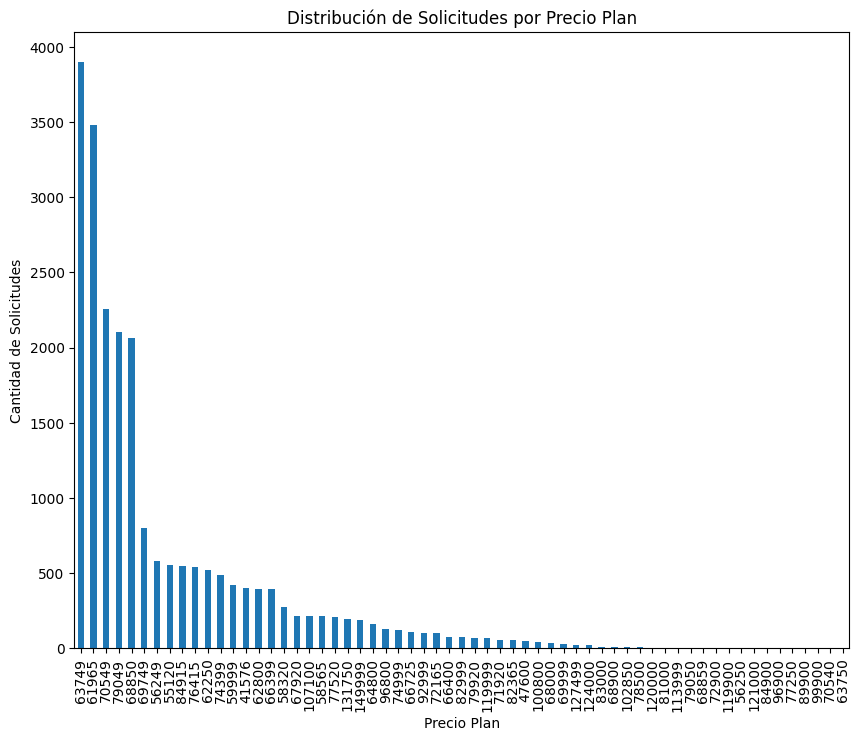

In [22]:
#df.estrato.value_counts().sort_index().plot(kind="bar")
plt.figure(figsize=(10,8)) 
df.price_plan.value_counts().plot(kind="bar")
plt.xlabel("Precio Plan")
plt.ylabel("Cantidad de Solicitudes")
plt.title("Distribución de Solicitudes por Precio Plan")
plt.show()

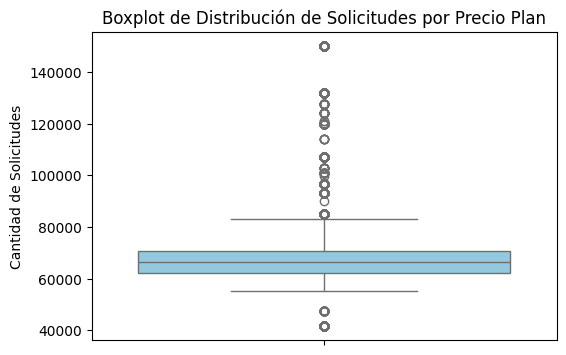

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['price_plan'], color='skyblue')

plt.title('Boxplot de Distribución de Solicitudes por Precio Plan')
plt.ylabel("Cantidad de Solicitudes")

plt.show()

In [9]:
# Análisis univariado de price_plan por estrato

# Estadísticas descriptivas
print("Estadísticas descriptivas de price_plan por estrato:")
df.groupby('estrato')['price_plan'].describe()

Estadísticas descriptivas de price_plan por estrato:


,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
1,4933.0,65218.628015,8546.466160,41576.0,61965.0,63749.0,68850.0,149999.0
2,6611.0,66669.121010,10733.400721,41576.0,61965.0,63749.0,69749.0,149999.0
3,5652.0,67494.260616,12720.301091,41576.0,61965.0,63749.0,70549.0,149999.0
4,2701.0,76622.121066,16332.947158,41576.0,67920.0,76415.0,79049.0,149999.0
5,1540.0,79333.079221,18342.812966,47600.0,69749.0,76415.0,79049.0,149999.0
6,956.0,83179.247908,20669.132871,47600.0,70549.0,79049.0,82365.0,149999.0


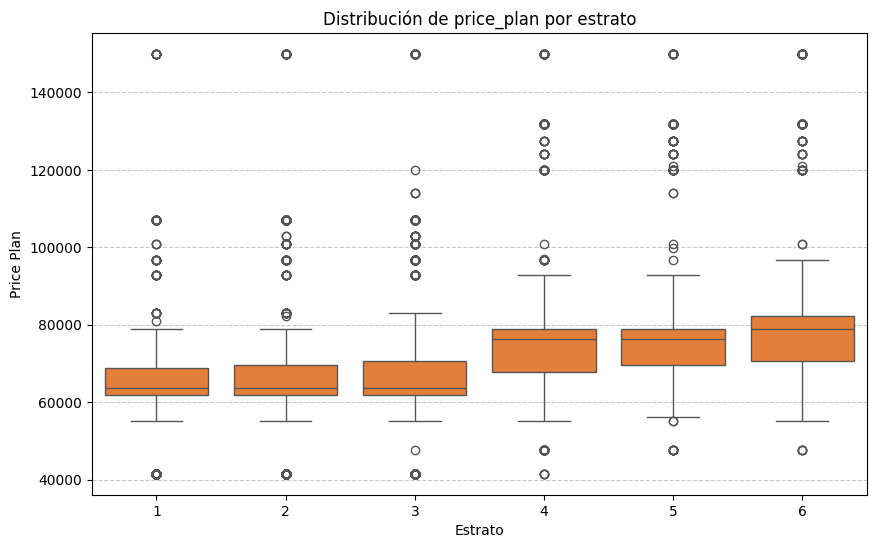

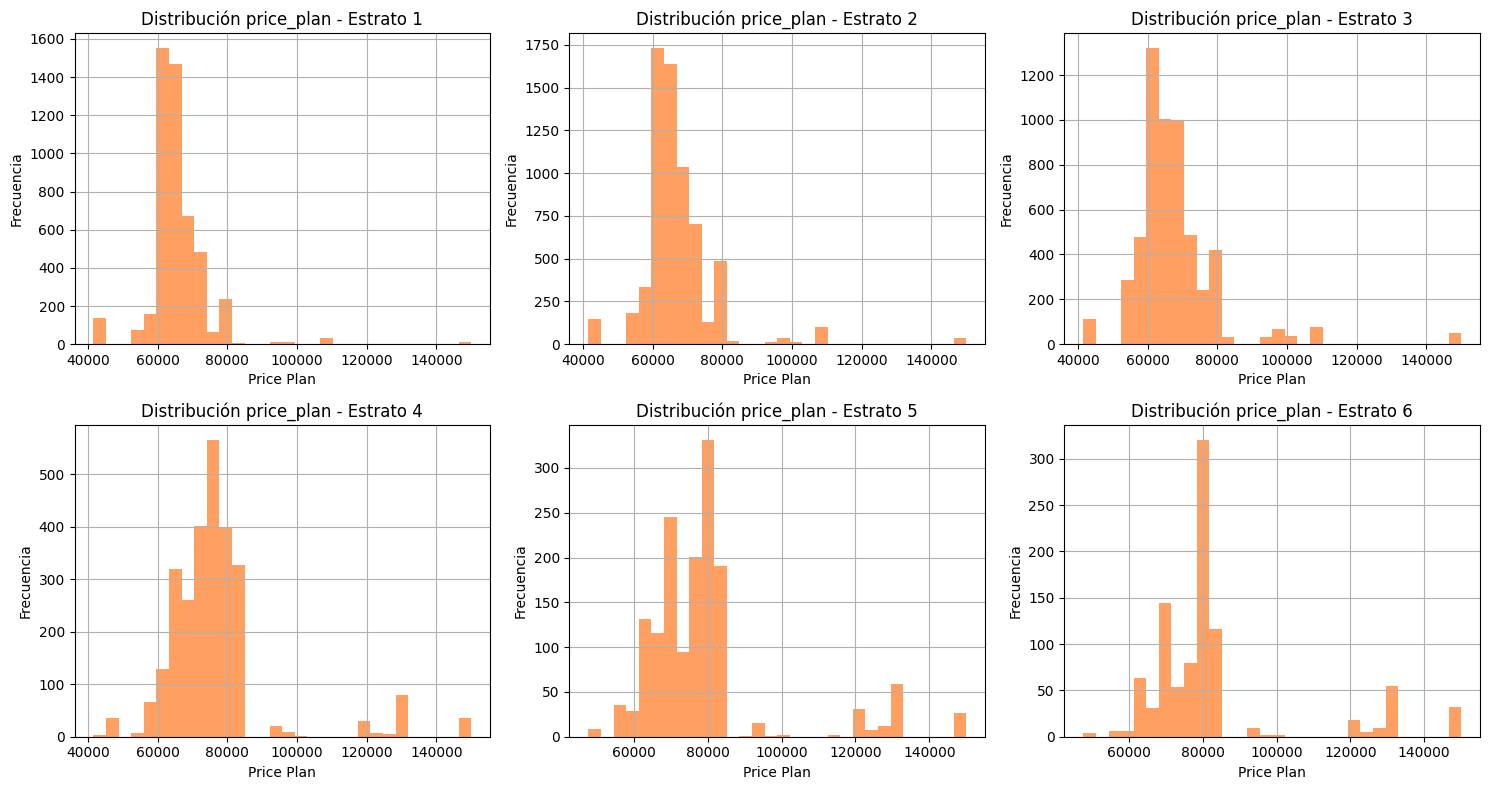

In [10]:
# Visualización con boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='estrato', y='price_plan', data=df, color='#FF781F')
plt.title('Distribución de price_plan por estrato')
plt.xlabel('Estrato')
plt.ylabel('Price Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histograma por estrato
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    df[df['estrato']==i]['price_plan'].hist(bins=30, color='#FF781F', alpha=0.7)
    plt.title(f'Distribución price_plan - Estrato {i}')
    plt.xlabel('Price Plan')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


Conclusiones del análisis univariado de la variable price_plan (Precio del Plan):

El análisis univariado de la variable price_plan permite entender la estructura de precios de los planes de servicios de internet y su distribución entre los clientes. 

A continuación, se presentan las principales conclusiones basadas en las métricas estadísticas y las visualizaciones generadas:

**Distribución de los Precios**

- La mayoría de los planes se concentran entre 62,000 COP y 70,500 COP, como se observa en el histograma.
- El precio promedio es 69,334 COP, lo que indica un punto de equilibrio en la oferta comercial.
- El precio mínimo es 41,576 COP, sugiriendo que hay opciones accesibles dentro del portafolio de servicios.

**Dispersión y variabilidad de los precios**

- Desviación estándar (std): 13,877 COP, lo que indica una variabilidad moderada en los precios.
- 50% (mediana) de los planes cuestan hasta 66,399 COP, indicando que este es el precio más representativo de la mayoría de los clientes.

**Identificación de valores atípicos (outliers)**

- El boxplot revela que hay outliers por encima de 80,000 COP, lo que indica que hay planes significativamente más costosos que el promedio.
- También se observan algunos valores atípicos por debajo del cuartil 1, lo que podría representar planes con descuentos especiales o promociones.

**Relación entre Estrato y Precio del Plan**

- En estratos bajos (1, 2, 3): Se observa una mayor concentración de planes en el rango de 62,000 a 70,000 COP, lo que sugiere que estos clientes prefieren opciones accesibles.
- En estratos altos (4, 5, 6): Hay una mayor dispersión en los precios, con más presencia de planes premium por encima de 80,000 COP.
- El precio promedio aumenta con el estrato socioeconómico, como lo muestra la tabla resumen por estrato:
Estrato 1: 65,218 COP
Estrato 2: 66,669 COP
Estrato 3: 67,494 COP
Estrato 4: 76,622 COP
Estrato 5: 79,333 COP
Estrato 6: 83,179 COP

**Conclusión**

La mayoría de los clientes optan por planes con precios entre 62,000 y 70,500 COP, lo que representa el segmento de mayor demanda.
Los estratos más bajos prefieren precios más accesibles, mientras que los estratos altos muestran mayor disposición a pagar por planes premium.
Existen planes premium superiores a 100,000 COP, pero son una minoría en la distribución.
Los valores atípicos (planes muy costosos) pueden representar paquetes especiales, servicios diferenciados o nichos de mercado específicos.
